In [1]:
import os
import numpy as np
import gstools as gs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
# %config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Times New Roman',
          'font.size': 13,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

## 场景 A 均质场

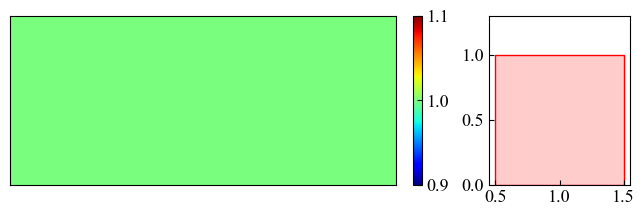

In [2]:
field = np.ones((100, 400)) * 1
x_min, x_max = 0, 400
y_min, y_max = 0, 100

fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
im = axes[0].imshow(field, aspect='auto', cmap="jet")
plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_yticks([])
axes[0].set_yticklabels([])

sns.histplot(field.ravel(), ax=axes[1], color='red', alpha=0.2, stat='density', edgecolor='red')
axes[1].set_ylabel("")
axes[1].set_ylim(0.0, 1.3)

np.save('./input_data/init_hk/hk_1_single.npy', field)

## 场景 B 高斯分布

最小值:  0.003761703774571525
最大值:  216.09574698557358


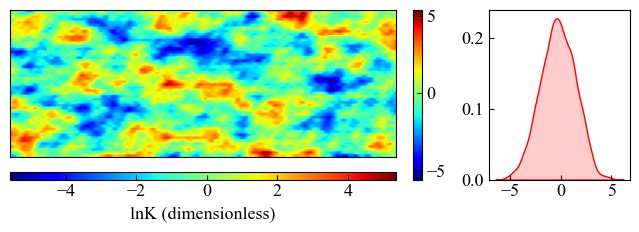

In [4]:
x = np.arange(50)
y = np.arange(200)
# model = gs.Gaussian(dim=2, var=2.5, len_scale=[3, 15])
# model = gs.Exponential(dim=2, var=2.5, len_scale=[15, 15])
# model = gs.Integral(dim=2, var=2.5, len_scale=[15, 15])
# model = gs.Stable(dim=2, var=2.5, len_scale=[15, 15])
# model = gs.Rational(dim=2, var=2.5, len_scale=[15, 15])
# model = gs.Cubic(dim=2, var=2.5, len_scale=[15, 15])
# model = gs.Spherical(dim=2, var=2.5, len_scale=[15, 15])
model = gs.Matern(dim=2, var=3.12, len_scale=[2.5, 7.5], nu=1)
# model = gs.Matern(dim=2, var=3.12, len_scale=[5, 15], nu=1)

srf = gs.SRF(model, seed=181)
field = srf.structured([x, y])
# field = srf.transform("normal_to_arcsin")
# field = srf.transform("zinnharvey", conn="high")
# field = srf.transform("zinnharvey", conn="low")
# field = srf.transform("normal_to_uniform")
field_scaled = np.exp(field)
# target_min, target_max = 5, 185
# field_scaled = np.interp(field, (field.min(), field.max()), (target_min, target_max))

fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
norm = colors.LogNorm(vmin=field_scaled.min(), vmax=field_scaled.max())
# im = axes[0].imshow(field_scaled, norm=norm, cmap="jet", aspect='auto') # origin='lower', 
im = axes[0].imshow(field, aspect='auto', cmap="jet")
print("最小值: ", field_scaled.min())
print("最大值: ", field_scaled.max())
plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_yticks([])
axes[0].set_yticklabels([])

divider = make_axes_locatable(axes[0])
cax = divider.append_axes("bottom", size="5%", pad=0.15)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
# cbar = fig.colorbar(im, ax=axes[0], orientation="horizontal", fraction=0.046, pad=0.15)
cbar.set_label("lnK (dimensionless)")

# field = field.flatten()
sns.kdeplot(field.flatten(), ax=axes[1], fill=True, color='red', alpha=0.2)
axes[1].set_ylabel("")
plt.show()

np.save('./input_data/init_hk/hk_2_gaussian.npy', field_scaled)

## 场景 C zinn high 分布

最小值:  0.03781943636985415
最大值:  61.387787778344084


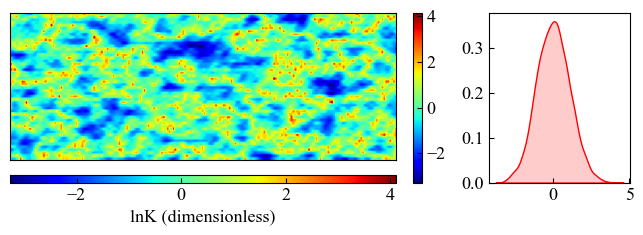

In [8]:
x = np.arange(50)
y = np.arange(200)

model = gs.Matern(dim=2, var=1.23, len_scale=[2.5, 7.5], nu=1)
srf = gs.SRF(model, seed=181)
field = srf.structured([x, y])

field = srf.transform("zinnharvey", conn="high")
field_scaled = np.exp(field)

fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
norm = colors.LogNorm(vmin=field_scaled.min(), vmax=field_scaled.max())
im = axes[0].imshow(field, aspect='auto', cmap="jet")
print("最小值: ", field_scaled.min())
print("最大值: ", field_scaled.max())

divider = make_axes_locatable(axes[0])
cax = divider.append_axes("bottom", size="5%", pad=0.15)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("lnK (dimensionless)")

plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_yticks([])
axes[0].set_yticklabels([])
sns.kdeplot(field.flatten(), ax=axes[1], fill=True, color='red', alpha=0.2)
axes[1].set_ylabel("")
plt.show()

# np.save('./input_data/init_hk/hk_3_zinnharvey_high.npy', field_scaled)

## 场景 D zinn low 分布

In [ ]:
x = np.arange(100)
y = np.arange(400)
model = gs.Matern(dim=2, var=2.12, len_scale=[5, 15], nu=1)
srf = gs.SRF(model, seed=181)
field = srf.structured([x, y])
field = srf.transform("zinnharvey", conn="low")
field_scaled = np.exp(field)

fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
norm = colors.LogNorm(vmin=field_scaled.min(), vmax=field_scaled.max())
im = axes[0].imshow(field, aspect='auto', cmap="jet")
print("最小值: ", field_scaled.min())
print("最大值: ", field_scaled.max())

divider = make_axes_locatable(axes[0])
cax = divider.append_axes("bottom", size="5%", pad=0.15)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("lnK (dimensionless)")

plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_yticks([])
axes[0].set_yticklabels([])

sns.kdeplot(field.flatten(), ax=axes[1], fill=True, color='red', alpha=0.2)
axes[1].set_ylabel("")
plt.show()

np.save('./input_data/init_hk/hk_4_zinnharvey_low.npy', field_scaled)

## 场景 D 反正弦分布

In [ ]:
x = np.arange(100)
y = np.arange(400)
model = gs.Matern(dim=2, var=10, len_scale=[5, 15], nu=1)
srf = gs.SRF(model, seed=181)
field = srf.structured([x, y])
field = srf.transform("normal_to_arcsin")
field_scaled = np.exp(field)

fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
norm = colors.LogNorm(vmin=field_scaled.min(), vmax=field_scaled.max())
im = axes[0].imshow(field, aspect='auto', cmap="jet")
print("最小值: ", field_scaled.min())
print("最大值: ", field_scaled.max())

divider = make_axes_locatable(axes[0])
cax = divider.append_axes("bottom", size="5%", pad=0.15)
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("lnK (dimensionless)")

plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_yticks([])
axes[0].set_yticklabels([])

sns.kdeplot(field.flatten(), ax=axes[1], fill=True, color='red', alpha=0.2)
axes[1].set_ylabel("")
plt.show()

np.save('./input_data/init_hk/hk_5_arcsin.npy', field_scaled)

## (删除)场景 均匀分布

In [ ]:
import matplotlib.colors as colors
x = np.arange(100)
y = np.arange(400)

model = gs.Matern(dim=2, var=10, len_scale=[5, 15], nu=1)
srf = gs.SRF(model, seed=181)
field = srf.structured([x, y])

field = srf.transform("normal_to_uniform")
field_scaled = np.exp(field)
target_min, target_max = 0.085, 85
field_scaled = np.interp(field, (field.min(), field.max()), (target_min, target_max))

fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
norm = colors.LogNorm(vmin=field_scaled.min(), vmax=field_scaled.max())
im = axes[0].imshow(field, aspect='auto', cmap="jet")
print("最小值: ", field_scaled.min())
print("最大值: ", field_scaled.max())

plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
axes[0].set_xticks([])
axes[0].set_xticklabels([])
axes[0].set_yticks([])
axes[0].set_yticklabels([])

sns.kdeplot(field.flatten(), ax=axes[1], fill=True, color='red', alpha=0.2)
axes[1].set_ylabel("")
plt.show()

np.save('./input_data/init_hk/hk_6_uniform.npy', field_scaled)

## 场景 X MPS 分布(删除)

In [ ]:
# from matplotlib.colors import ListedColormap

# # np.save('./input_data/hk_mps.npy', field_scaled)

# # 加载数据
# data_mps = np.load("./input_data/mps.npy")
# data_mps = data_mps[9, :100, :]
# field = data_mps
# target_min, target_max = 0.85, 85
# field_scaled = np.interp(field, (field.min(), field.max()), (target_min, target_max)) # ! 修改最大最小值
# fig, axes = plt.subplots(1, 2, figsize=(8, 2.2), gridspec_kw={'width_ratios': [3, 1]})
# # ! 左侧随机场图像
# # 创建自定义的两种颜色的 colormap
# colors = ['#2f7aff', '#c70039'] # 你可以指定任意两种颜色
# custom_cmap = ListedColormap(colors)
# im = axes[0].imshow(field_scaled, cmap=custom_cmap, aspect='auto')
# plt.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)
# # 设置 x 轴标签
# x_min, x_max = 0, 400
# x_ticks = np.linspace(0, field_scaled.shape[1], 5)  # 5个刻度
# x_labels = np.linspace(x_min, x_max, 5)  # 标签范围
# axes[0].set_xticks(x_ticks)
# axes[0].set_xticklabels(x_labels)
# axes[0].set_xticks([])
# axes[0].set_xticklabels([])
# axes[0].set_yticks([])
# axes[0].set_yticklabels([])
# # ! 右侧 kdeplot 图
# flat_field = field_scaled.flatten()
# sns.kdeplot(flat_field, ax=axes[1], fill=True, color='red', alpha=0.2)
# axes[1].set_ylabel("")
# plt.show()

# np.save('./input_data/init_hk/hk_5_hk_mps.npy', field_scaled)